### 多器官分割标签返回
#### 63 Liver 126 Left Kidney 189 Right Kidney 252 Spleen 

In [112]:
from this import d
import numpy as np
import pydicom as dicom
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2
import h5py
import os
from tqdm import tqdm
## the directory with datatset
root_dir = "/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/"
files = glob.glob(root_dir)
image_path = []
label_path = []
CT_test_list = ['003','004','007','009','011','012','013','015','017','020']
test_list = ['004','006','007','009','011','012','014','016','017','018','023',
             '024','025','026','027','028','029','030']

data_model = "MR"
# for CT
if data_model == "CT":
    CT_root = os.path.join(root_dir,"CT")
    for each in os.listdir(CT_root):
        each_path = os.path.join(CT_root,each) #"/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/CT/1/"
        image_lst = os.listdir(os.path.join(each_path,'DICOM_anon')) # DICOM_anno and Ground
        label_lst = os.listdir(os.path.join(each_path,'Ground'))
        for i in range(len(image_lst)):
            image_path.append(os.path.join(each_path,'DICOM_anon',image_lst[i]))
            label_path.append(os.path.join(each_path,'Ground',image_lst[i]))
#for MRI, only T2SPIR is loaded
elif data_model == "MR":
    MR_root = os.path.join(root_dir,"MR")
    for each in os.listdir(MR_root):
        each_path = os.path.join(MR_root,each)
        if "T2SPIR" in os.listdir(each_path):
            image_lst = os.listdir(os.path.join(each_path,"T2SPIR/DICOM_anon"))
            for i in range(len(image_lst)):
                image_path.append(os.path.join(each_path,'T2SPIR/DICOM_anon',image_lst[i]))
                label_path.append(os.path.join(each_path,'T2SPIR/Ground',image_lst[i].replace('.dcm','.png')))
            
print(image_path[0])
print(label_path[0])
image = dicom.read_file(image_path[3]).pixel_array
label = np.array(Image.open(label_path[3]).convert('L'))
print(image.shape)
print(label.shape)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/test_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/',exist_ok=True)
train_file = open('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/train.txt','w')
test_file = open('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/test.txt','w')

# train and val dataset split
order = np.arange(len(image_path))
np.random.shuffle(order)
test_order = order[:int(len(image_path)/4)]
test_data_path = (np.array(image_path).take(test_order))

for i in tqdm(range(len(image_path))):
    name_case = image_path[i].split("/")[-1].replace('.dcm','')
    image = dicom.read_file(image_path[i]).pixel_array
    label = np.array(Image.open(label_path[i]).convert('L'))
    image = image/255
    # train dataset 
    for test_data_case in test_data_path:
        if name_case in test_data_case:
            case = 'test'
            break
        else:
            case = 'train'
    if case == 'train':
        case_image = cv2.resize(image,(224,224),interpolation=cv2.INTER_NEAREST)
        case_label = cv2.resize(label,(224,224),interpolation=cv2.INTER_NEAREST)
        np.savez("/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz/" + str(name_case),image = case_image, label=case_label)
        train_file.write(str(name_case) +'.npz'+'\n')

    elif case == 'test':
        case_image = cv2.resize(image,(224,224),interpolation=cv2.INTER_NEAREST)
        case_label = cv2.resize(label,(224,224),interpolation=cv2.INTER_NEAREST)
        np.savez("/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/test_npz/" + str(name_case), image = case_image, label=case_label)
        test_file.write(str(name_case) +'.npz'+'\n')
train_file.close()
test_file.close()

/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/MR/21/T2SPIR/DICOM_anon/IMG-0001-00004.dcm
/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/MR/21/T2SPIR/Ground/IMG-0001-00004.png
(256, 256)
(256, 256)


100%|██████████| 623/623 [00:01<00:00, 456.88it/s]


[  0  63 126 189 252]
(224, 224)


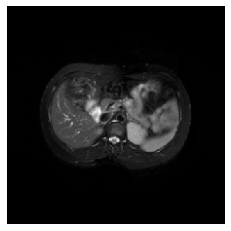

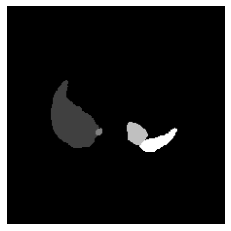

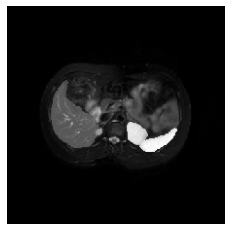

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
data = np.load('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz/IMG-0022-00020.npz')
image, label = data['image'], data['label']
print(np.unique(label))
# label = np.array(label == 3,dtype=np.uint8)
# print(label.max())
image1 = (image * 255).astype(np.uint8)
label1 = (label*255).astype(np.uint8)
print(image.shape)
plt.imshow(image,'gray')
plt.axis('off')
plt.show()
plt.imshow(label,'gray')
plt.axis('off')
plt.show()
image_label = image+label*0.02
plt.imshow(image_label,'gray')
plt.axis('off')
plt.show()

### multi-organ split
- 多器官标签转化为单器官标签

In [139]:
import numpy as np
import pydicom as dicom
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2
import h5py
import os
from tqdm import tqdm
## the directory with datatset
root_dir = "/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/"
files = glob.glob(root_dir)
image_path = []
label_path = []
CT_test_list = ['003','004','007','009','011','012','013','015','017','020']
test_list = ['004','006','007','009','011','012','014','016','017','018','023',
             '024','025','026','027','028','029','030']

data_model = "MR"
# for CT
if data_model == "CT":
    CT_root = os.path.join(root_dir,"CT")
    for each in os.listdir(CT_root):
        each_path = os.path.join(CT_root,each) #"/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/CT/1/"
        image_lst = os.listdir(os.path.join(each_path,'DICOM_anon')) # DICOM_anno and Ground
        label_lst = os.listdir(os.path.join(each_path,'Ground'))
        for i in range(len(image_lst)):
            image_path.append(os.path.join(each_path,'DICOM_anon',image_lst[i]))
            label_path.append(os.path.join(each_path,'Ground',image_lst[i]))
#for MRI, only T2SPIR is loaded
elif data_model == "MR":
    MR_root = os.path.join(root_dir,"MR")
    for each in os.listdir(MR_root):
        each_path = os.path.join(MR_root,each)
        if "T2SPIR" in os.listdir(each_path):
            image_lst = os.listdir(os.path.join(each_path,"T2SPIR/DICOM_anon"))
            for i in range(len(image_lst)):
                image_path.append(os.path.join(each_path,'T2SPIR/DICOM_anon',image_lst[i]))
                label_path.append(os.path.join(each_path,'T2SPIR/Ground',image_lst[i].replace('.dcm','.png')))
            
print(image_path[0])
print(label_path[0])
image = dicom.read_file(image_path[3]).pixel_array
label = np.array(Image.open(label_path[3]).convert('L'))
print(image.shape)
print(label.shape)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/test_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/',exist_ok=True)
train_file = open('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/train.txt','w')
test_file = open('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/lists_CHAOS/test.txt','w')

# train and val dataset split
order = np.arange(len(image_path))
np.random.shuffle(order)
test_order = order[:int(len(image_path)/4)]
test_data_path = (np.array(image_path).take(test_order))

for i in tqdm(range(len(image_path))):
    name_case = image_path[i].split("/")[-1].replace('.dcm','')
    image = dicom.read_file(image_path[i]).pixel_array
    label = np.array(Image.open(label_path[i]).convert('L'))
    cls_label = (np.unique(label)) #[0 63 126 189 252]
    image = image/255
    # train dataset 
    for test_data_case in test_data_path:
        if name_case in test_data_case:
            case = 'test'
            break
        else:
            case = 'train'
    if case == 'train':
        case_image = cv2.resize(image,(224,224),interpolation=cv2.INTER_NEAREST)
        case_label = cv2.resize(label,(224,224),interpolation=cv2.INTER_NEAREST)
        for label_item in cls_label:
            if label_item != 0:
                case_label_ = np.array(case_label == label_item,dtype=np.uint8) * label_item
                np.savez("/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz/" + str(name_case) + f"_cls_{label_item}",image = case_image, label=case_label_)
                train_file.write(str(name_case) + f"_cls_{label_item}" +'.npz'+'\n')

    elif case == 'test':
        case_image = cv2.resize(image,(224,224),interpolation=cv2.INTER_NEAREST)
        case_label = cv2.resize(label,(224,224),interpolation=cv2.INTER_NEAREST)
        for label_item in cls_label:
                if label_item != 0:
                    case_label_ = np.array(case_label == label_item,dtype=np.uint8)
                    np.savez("/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/test_npz/" + str(name_case) + f"_cls_{label_item}",image = case_image, label=case_label_)
                    test_file.write(str(name_case) + f"_cls_{label_item}" +'.npz'+'\n')
train_file.close()
test_file.close()

/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/MR/21/T2SPIR/DICOM_anon/IMG-0001-00004.dcm
/home/jaye/Documents/MedicalDatasets/CHAOS/Train_Sets/MR/21/T2SPIR/Ground/IMG-0001-00004.png
(256, 256)
(256, 256)


100%|██████████| 623/623 [00:01<00:00, 335.11it/s]


[ 0 63]
(224, 224)


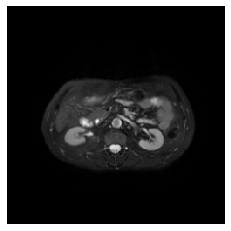

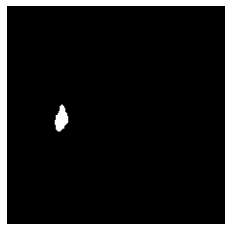

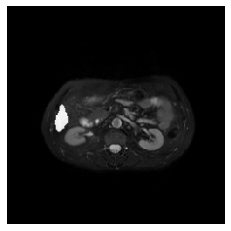

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
data = np.load('/home/jaye/Documents/MedicalDatasets/CHAOS/processed_training/train_npz/IMG-0001-00012_cls_63.npz')
image, label = data['image'], data['label']
print(np.unique(label))
# label = np.array(label == 3,dtype=np.uint8)
# print(label.max())
image1 = (image * 255).astype(np.uint8)
label1 = (label*255).astype(np.uint8)
print(image.shape)
plt.imshow(image,'gray')
plt.axis('off')
plt.show()
plt.imshow(label,'gray')
plt.axis('off')
plt.show()
image_label = image+label*0.1
plt.imshow(image_label,'gray')
plt.axis('off')
plt.show()